<a href="https://colab.research.google.com/github/KrzysztofNa/data_science_bootcamp/blob/master/01_pierwsza_siec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Istnieje tylko w Google Colab, wersja szybsza ;)
%tensorflow_version 2.x

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import tensorflow as tf
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

np.set_printoptions(precision=12, suppress=True, linewidth=120)
print(tf.__version__)

2.3.0


In [3]:
(X_train, y_train), (X_test, y_test) = load_data()

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

11493376/11490434 [==============================] - 0s 0us/step
X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [4]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

In [5]:
print(f'X_train[0] shape: {X_train[0].shape}')

X_train[0] shape: (28, 28)


In [6]:
# aby uzyskac wartosci z przedzialu [0, 1]
X_train = X_train / 255.
X_test = X_test / 255.

(-0.5, 27.5, 27.5, -0.5)

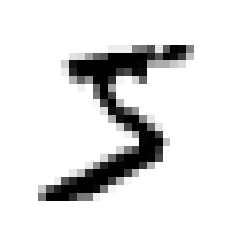

In [7]:
plt.imshow(X_train[0], cmap='gray_r')
plt.axis('off')

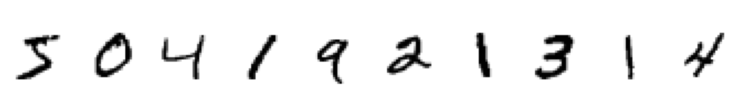

In [8]:
plt.figure(figsize=(13, 13))
for i in range(1, 11):
    plt.subplot(1, 10, i)
    plt.axis('off')
    plt.imshow(X_train[i-1], cmap='gray_r')
    plt.title(y_train[i-1], color='white', fontsize=16)
plt.show()

In [9]:
# model na podstawie Keras
model = Sequential()
model.add(Flatten(input_shape=(28, 28))) # dadawanie kolejnych warstw (tu warstwa wypłaszczająca)
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [10]:
history = model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2916 - accuracy: 0.9141
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1439 - accuracy: 0.9578
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1085 - accuracy: 0.9669
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0877 - accuracy: 0.9729
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0751 - accuracy: 0.9766


In [12]:
model.evaluate(X_test, y_test, verbose=2)

313/313 - 0s - loss: 0.0746 - accuracy: 0.9778


[0.07462866604328156, 0.9778000116348267]

In [14]:
metrics = pd.DataFrame(history.history)
metrics

,loss,accuracy
0,0.291612,0.914117
1,0.143905,0.957850
2,0.108451,0.966867
3,0.087684,0.972867
4,0.075108,0.976583


In [15]:
fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(y=metrics['loss'], name='loss'), row=1, col=1)
fig.add_trace(go.Scatter(y=metrics['accuracy'], name='accuracy'), row=2, col=1)
fig.update_layout(width=800, height=400)

In [16]:
model.predict(X_test)

array([[0.000000167518, 0.000000008887, 0.00005924237 , ..., 0.999688      , 0.000001026473, 0.000027710948],
       [0.00000007736 , 0.000009190411, 0.9999887     , ..., 0.            , 0.000000142864, 0.000000000001],
       [0.00000080386 , 0.997797      , 0.00020773456 , ..., 0.001666537   , 0.00023995992 , 0.000001202784],
       ...,
       [0.000000000005, 0.000000000849, 0.000000000068, ..., 0.000020419331, 0.000001610756, 0.00000097631 ],
       [0.000000011332, 0.000000000603, 0.000000000046, ..., 0.000000001063, 0.00006119612 , 0.000000000002],
       [0.000000000615, 0.000000000001, 0.000000106995, ..., 0.000000000002, 0.000000003734, 0.000000000001]],
      dtype=float32)

In [17]:
y_pred = model.predict_classes(X_test)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([7, 2, 1, ..., 4, 5, 6])

In [18]:
y_pred = model.predict_classes(X_test)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [19]:
pred = pd.concat([pd.DataFrame(y_test, columns=['y_test']), pd.DataFrame(y_pred, columns=['y_pred'])], axis=1)
pred.head(10)

,y_test,y_pred
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,6
9,9,9


In [20]:
misclassified = pred[pred['y_test'] != pred['y_pred']]
misclassified.index[:10]

Int64Index([8, 151, 247, 321, 340, 381, 412, 445, 478, 582], dtype='int64')

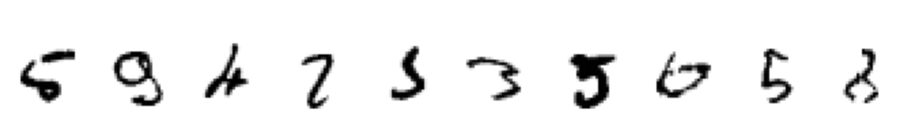

In [21]:
plt.figure(figsize=(16, 16))
for i, j in zip(range(1, 11), misclassified.index[:10]):
    plt.subplot(1, 10, i)
    plt.axis('off')
    plt.imshow(X_test[j], cmap='gray_r')
    plt.title(f'y_test: {y_test[j]}\ny_pred: {y_pred[j]}', color='white', fontsize=12)
plt.show()